# Naive Bayes intuition and its application in text classification

<p style='text-align:justify'>In this notebook I am going to discuss the intuition behind Naive Bayes method and its applications in text classification. Naive Bayes is simple yet powerful method for predictive modeling. And, one of its main application is in automatic text classification.</p> 

## What is Naive Bayes Classifier?

<p style='text-align:justify'>Naive Bayes classifier is a simple probabilistic method which is built upon Bayes theorem. And, the reason it has naive in its name is that it has strong and naive assumption of feature independence. </p>

First, let's take a look at the Bayes theorem itself.

$$ P(C \mid X) = \frac{P(X \mid C) \, P(C)}{P(X)} $$

The Bayes formula is made up of of four components as follows.

- $
P(C \mid X) :
\:$ Postrior, which is the probability of class $ C $ given the observation $ X$

- $
P(C) :
\:$Prior, which is the prior probability (initial belief) of class $ C $

- $
P(X \mid C) :
\:$Likelihood, which is the probability of obsevation $X$ given class $C$.

- $
P(X) :
\:$Evidence, which is the probability of obsevation $X$.


In other words, it can be written as follows.

$$
\begin{align*}
Postrior = \frac{Likelihood \times Prior}{Evidence}
\end{align*}
$$

<p style='text-align:justufy'>Now, we are going to interpret Naive Bayes classifier in the context of text classification with the use of examples. Consider that the problem at hand is to classify whether a user’s reviw on a product is positive or negative. Therefore, in this specific case the problem is a binary classification. So, $ C $ in the Bayes formula can take two values: positive and negative.</p>

What is $ X $ then in the Bayes formula for this example? $ X $ would be a sentence. For instance consider the following sentence:

$ X $ = "It is a very useful product"

To us, it is kind of clear that it is a positive review ($ C=positive $). In Bayesian term it is equivalent of the following formula.

$$ P(\:C=positive \mid \text{"It is a very useful product"}\:) = \frac{P(\:\text{"It is a very useful product"} \mid C=positive\:) \, P(C=positive)}{P(\text{"It is a very useful product"})} $$

Now, the question is how can we calculate $ P(\:\text{"It is a very useful product"} \mid C=positive\:) $ ?

If we look at each word as a feature, i.e., It=x1, is=x2, a=x3, very= x4, useful=x5, product=x6, then we can write the likelihood as follows:

$$ P(\:\text{"It is a very useful product"} \mid C=positive\:) = P(\:\:(x_1,x_2,x_3,x_4,x_5) \mid C=positive\:) $$

<p style='text-align:justify'>So, we need to calculate the joint probability of occurrences of these words (features). That is where the real problem arises since calculating this joint probability is almost impractical. Now, the naive assumption of independence of feature becomes handy. In other word, if we assume that all words in the above sentence are independent of each other, then the joint probability can be written as the product of the probability of each word as follows:</p>

$$ P(\:\text{It is a very useful product}\mid C) = P(It\mid C)\:P(is\mid C)\:P(a\mid C)\:P(very\mid C)\:P(useful\mid C)\:P(product\mid C) $$

In other words,

$$ P(\:x_1,x_2,x_3,x_4,x_5 \mid C)\:=\: P(x_1\mid C)\:P(x_2 \mid C)\:P(x_3\mid C)\:P(x_4\mid C)\:P(x_5\mid C)   $$

The Naive Bayes model can be illustrated using the following Bayesian network.

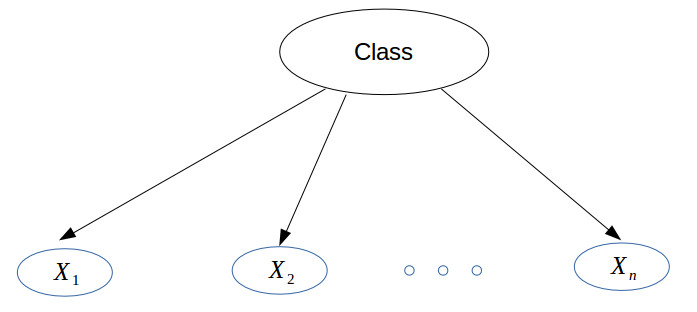

In [2]:
from IPython.display import Image
Image('Pics/BayesianNetwork.jpg')

$$ (\:X_i \: \bot \:  X_j \mid C)\:\: \text{for all} \: X_i,\: X_j $$

<p style='text-align:justify'>Note that the denominator of the Bayes rule (P(X)) stays the same for all classes. Therefore, we can skip calculating it since it just acts as a normalizer. To be more concrete, the probability of the sentence "It is a very useful product" is the same for both positive and negative classes. In other word since the probability of evidence in not conditioned on a class it is the same for all classes. Hence, by considering the independence assumption and ignoring the denominator the Naive Bayes formula can be written as follows.</p>

$$ P(\: C \mid (x_1,x_2,...,x_n)\:) \simeq P(C) \prod_{i=1}^{i=n} P(\:x_i\mid C) $$

<p style='text-align:justify'>Intuitively in our sentence, the word "useful" is probably more associated with the positive class and therefore we expect the $ P(useful\mid positive) > P(useful\mid negative) $. But, we don't expect that for example the word "product" to be more probable in one class than another class.</p>

# Python implementation of Naive Bayes classifier for text classification

Now, it is time to implement Naive Bayes classifier to have a more practical sense of it.

First, let's import the required libraries.

In [3]:
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/peymas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<p style='text-align:justify'>One of the most import libraries for natural language processing is NLTK. It provides more than 50 corpora and lexical resources and interfaces to work with them, also it provides text processing libraries including tokenization, stemming, parsing, classification and etc.</p>

<p style='text-align:justify'>The next step is to load a data set to work with. A truncated version of Amazon reviews dataset which contains 10000 text reviews and their tags is used. This dataset contains positive and negative reviews. The task is to classify reviews into either of classes. This task is known as sentiment analysis in NLP.</p>

In [9]:
data = pd.read_csv('./corpus.csv',encoding='iso-8859-1')

It is time to partition the dataset into train and validation.

In [13]:
train_x, valid_x, train_y, valid_y = \
    model_selection.train_test_split(data['text'], data['label'],test_size=.3)

<p style='text-align:justify'>The next step is to calculate the probability of each class. Doing so we will obtain priors in the Bayes formula. It can be easily done by counting number of occurrences of each class divided by the total number of reviews.</p>

In [14]:
pi = np.array(train_y.value_counts()/len(train_y))
print(pi)

[0.51128571 0.48871429]


We need to encode the labels into numerical values since the values of the labels are categorical.

In [16]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [17]:
print(np.unique(train_y))

[0 1]


Value 0 corresponds to negative class and 1 corresponds to positive class.

<p style='text-align:justify'>We know that we can not feed text as string to the model, so we need a way to represent text as numerical value to the model. One of the easiest encoding that we can use is the Bag of Words (BoW) encoding. It takes into account words and their frequency of occurrence in the sentence.</p>

<p style='text-align:justify'>The CountVectorizer function from sklearn.feature_extraction.text is the function that encode text using the BoW method. It basically returns the matrix of token counts.</p>

In [18]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_x)
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x).todense()
xvalid_count =  count_vect.transform(valid_x).todense()

<p style='text-align:justify'>The next step is to calculate the probability of occurrence of each word per class, i.e., likelihood. To do that we are going to create a dataframe that contain three columns: words,class1,and class2. The class1 column will be containing the likelihood for class1 (negative reviews) and class2 column is going to contain the likelihood for class2 (positive reviews).</p>

<p style='text-align:justify'>However, one important technicality must be considered. The thing is that since some words might not occur in one of the classes, then the likelihood of those words will become zero. Having a zero likelihood for a word is very damaging to the model's performance because it causes the posterior to be zero which does not make sense. To elevate this problem a kind of smoothing which is called Laplace smoothing is used which is defined as follows.</p>

$$ P(X_i \mid C_j) = \frac{count_{ij}+\alpha}{count_j+|V|+1} $$

In the above formula $ count_{ij} $ is the number of occurrences of word i in class j. $ count_j $ is total number of words in class j and |v| is the vocab size in class j.

In [19]:
wordFreq = pd.DataFrame(columns=['words','class1','class2'])
wordFreq['words'] = count_vect.get_feature_names()

x_train_class1 = xtrain_count[train_y==0]
x_train_class2 = xtrain_count[train_y==1]

count_class1 = np.sum(x_train_class1,axis=0)
count_class2 = np.sum(x_train_class2,axis=0)

vocab_size1 = len(np.where(count_class1==0)[1])
vocab_size2 = len(np.where(count_class2==0)[1])

alpha=10
count_class1 = np.array( (count_class1+alpha) /(np.sum(count_class1)+vocab_size1 +1))
count_class2 = np.array( (count_class2+alpha) /(np.sum(count_class2)+vocab_size2 +1))

wordFreq['class1'] = pd.Series(count_class1.ravel())
wordFreq['class2'] = pd.Series(count_class2.ravel())

Now it is time to iterate through all sentences for both train and validation data to calculate the accuracy on both sets.

In [20]:
train_preds = np.zeros(len(xtrain_count))
for i in range(len(xtrain_count)):
    idx = np.where(xtrain_count[i,:]!=0)[1]
    lh1 = wordFreq['class1'].iloc[idx].prod()
    lh2 = wordFreq['class2'].iloc[idx].prod()
    posterior1 = lh1*pi[0]
    posterior2 = lh2 * pi[1]

    if posterior1>posterior2:
        train_preds[i] = 0
    else:
        train_preds[i] = 1


matches = np.sum(train_y==train_preds)
print('Train accuracy is: '+str(matches/len(train_preds)))

Train accuracy is: 0.8594285714285714


In [21]:
valid_preds = np.zeros(len(xvalid_count))
for i in range(len(xvalid_count)):
    idx = np.where(xvalid_count[i,:]!=0)[1]
    lh1 = wordFreq['class1'].iloc[idx].prod()
    lh2 = wordFreq['class2'].iloc[idx].prod()
    posterior1 = lh1*pi[0]
    posterior2 = lh2 * pi[1]

    if posterior1>posterior2:
        valid_preds[i] = 0
    else:
        valid_preds[i] = 1

    temp = 1

matches = np.sum(valid_y==valid_preds)
print('Validation accuracy is: '+str(matches/len(valid_preds)))

Validation accuracy is: 0.813


Validation accuracy is 0.812, which is very promising given the simplicity of the model.